### 4.2 BPR排序算法

#### 一. BPR的概念
1. 推荐系统, 本质上是针对一系列物品的个性化排序问题.BPR使用贝叶斯思想来优化排序效果
2. BPR关注的是隐式反馈行为
3. SVD的矩阵分解模型(MF-matrix factorization)和KNN模型使用BPR-OPT优化函数后, 可以达到更好的效果
4. BPR用于协同过滤模型时, 会对每个用户产生各自的排序效果, 而非产生一个全局的统一排序

#### 二. 符号表示
1. $U$ : 用户集合. $I$ : 所有物品集合
3. $>_U$ : 所有物品的偏序关系,维度是$I^2$. 且$>_U$满足如下3个性质 : 
   1. 全体性 : $\forall i,j\in I$, $i\neq j\Longrightarrow i{ > }_{ u }j\vee j{ > }_{ u }i$  
   2. 反对称性 : $\forall i,j\in I$, $\left( i{ > }_{ u }j \right) \wedge \left( j{ > }_{ u }i \right) \Longrightarrow i=j$ 
   3. 传递性 : $\forall i,j,k\in I$, $\left( i{ > }_{ u }j \right) \wedge \left( j{ > }_{ u }k \right) \Longrightarrow \left( i{ > }_{ u }k \right) $
3. $S$ : 隐式反馈矩阵,维度是$U*I$. 由0和1组成  
 <img src='img/Sbpr.png' height='40%' width='40%'>
4. ${ I }_{ u }^{ + }=\left\{ i\in I:\left( u,i \right) \in S \right\} $ : 对于用户u, 做出反馈的物品集合    
 ${ U }_{ i }^{ + }=\left\{ u\in U:\left( u,i \right) \in S \right\} $ : 对于物品i, 做出反馈的用户集合
 
#### 三. BPR的训练集构造  
1. BPR的训练集是一个3元组(u,i,j). 其中i是用户做出反馈的1个物品, j是没有作出反馈的1个物品. 于是我们认为对于用户u, 作出反馈的物品i的排序应该在未作出反馈的物品j之前. 训练集表示为 : $${ D }_{ S }=\left\{ (u,i,j)|i\in { I }_{ u }^{ + }\wedge j\in I\setminus { I }_{ u }^{ + } \right\} $$即$\left( u,i,j \right) \in { D }_{ S }$表示用户u相比j更喜欢i.  
2. 现在, 我们可以从观测矩阵$R^{U*I}$,得到每个用户自己的偏序关系矩阵$R^{I*I}$,因此所有用户的偏序关系矩阵维度是$R^{U*I*I}$. 如下图, '+'表示更喜欢$i$, '-'表示更喜欢$j$
  <img src='img/bpr2.png' height='40%' width='40%'>  
  注意, 我们的训练集是由做出反馈的$i$和未作出反馈的$j$组成, 而测试集输入的物品都是未反馈的. 这说明训练集和测试集是割裂的

#### 四. BPR-OPT : BPR优化准则
1. 贝叶斯寻找最优排序的方法是, 最大化参数的后验概率(偏序关系下的参数概率)$p\left( \theta |{ > }_{ u } \right) $, 且根据贝叶斯公式有 : $$p\left( \theta |{ > }_{ u } \right) \propto p\left( { > }_{ u }|\theta  \right) p\left( \theta  \right) $$在所有用户集上的似然概率为 : $$\prod _{ u\in U }^{  }{ p\left( { > }_{ u }|\theta  \right)  } =\prod _{ \left( u,i,j \right) \in U*I*I }^{  }{ \left\{ { p\left( i{ > }_{ u }j|\theta  \right)  }^{ \delta \left( \left( u,i,j \right) \in { D }_{ S } \right)  }*{ \left( 1-p\left( i{ > }_{ u }j|\theta  \right)  \right)  }^{ \delta \left( \left( u,i,j \right) \notin { D }_{ S } \right)  } \right\}  } $$  
  1. 其中, $\delta \left( b \right) $是指数函数, 有$\delta \left( b \right) =\begin{cases} 1,\quad b=true \\ 0,\quad else \end{cases}$
  2. $p\left( i{ > }_{ u }j|\theta  \right) =sigmoid\left( { \hat { x }  }_{ uij }\left( \theta  \right)  \right) =\frac { 1 }{ 1+{ e }^{ -{ \hat { x }  }_{ uij }\left( \theta  \right)  } } $.   
    这里的${ \hat { x }  }_{ uij }\left( \theta  \right) $是任意实值函数, 表示用户,物品i,物品j三者的关系. 在MF和KNN中将有不同表示方法.  
  3. 为了方便计算, 假设先验概率服从正态分布, 即$\theta =N\left( 0,{ \Sigma  }_{ \theta  } \right) $. 为了简便计算, 我们设${ \Sigma  }_{ \theta  }={ \lambda  }_{ \theta  }I$  
2. 综合以上后验概率计算方法, 得出BPR-OPT优化使用的最大化对数似然为$$BPR-OPT=\sum _{ \left( u,i,j \right) \in U*I*I }^{  }{ \delta \left( \left( u,i,j \right) \in { D }_{ S } \right) \ln { p\left( i{ > }_{ u }j|\theta  \right)  } } +\delta \left( \left( u,i,j \right) \notin { D }_{ S } \right) \ln { \left( 1-p\left( i{ > }_{ u }j|\theta  \right)  \right)+\ln { p\left( \theta  \right)  }   } $$因为接下来, 我们的样本集都是从$D_S$中得出,所以指示函数${ \delta \left( \left( u,i,j \right) \in { D }_{ S } \right)  }=1$,${ \delta \left( \left( u,i,j \right) \notin { D }_{ S } \right)  }=0$, 因此有 :   
$$BPR-OPT=\sum _{ \left( u,i,j \right) \in { D }_{ S } }^{  }{ \ln { p\left( i{ > }_{ u }j|\theta  \right)  } +\ln { p\left( \theta  \right)  }  } \\  \quad \quad \quad \quad =\sum _{ \left( u,i,j \right) \in { D }_{ S } }^{  }{ \ln { p\left( i{ > }_{ u }j|\theta  \right)  }  } -{ \lambda  }_{ \theta  }{ \left\| \theta  \right\|  }^{ 2 }$$  
3. 以上, 我们得出了'贝叶斯个性化排序的优化函数'和'训练集构造方法', 再加上'BPR-learn'计算方法就得出了全部BPR的训练方法.  
 因此, BPR是一种最大化后验概率likely-hood的解决办法. 具体的用户u,物品i,物品j之间的关系需要靠MF或KNN算法给出

#### 五. BPR-Learning
1. `BPR-Learning`是利用随机梯度下降最小化`BPR-OPT`, 从而更新参数$\theta $ 
<img src='img/bprlearn2.png' height='85%' width='85%'>

2. ${ \hat { x }  }_{ uij }$到底是什么  
在`BPR-OPT`的后验概率中, 就包含${ \hat { x }  }_{ uij }$, 梯度更新中也包含${ \hat { x }  }_{ uij }$, 我们知道这代表了用户u,物品i,物品j三者之间的关系. 现在, 我们假设$${ \hat { x }  }_{ uij }={ \hat { x }  }_{ ui }-{ \hat { x }  }_{ uj }$$其中, ${ \hat { x }  }_{ ui }$和${ \hat { x }  }_{ uj }$可以来自协同过滤矩阵分解(MF-matrix factorization)或者KNN   
  1. 使用MF计算时  
   ${ \hat { x }  }_{ ui }$为用户向量和物品向量的点积$${ \hat { x }  }_{ ui }=\left< { w }_{ u },{ h }_{ i } \right> =\sum _{ f=1 }^{ k }{ { w }_{ uf }{ h }_{ if } } $$所以,针对3各参数的梯度下降为
      <img src='img/bpr31.png' weight='74%' width='74%'>
  2. 使用KNN计算时  
   ${ \hat { x }  }_{ ui }$的值, 依赖于物品i和所有用户已消费过的物品集合的相似度, 所以$${ \hat { x }  }_{ ui }=\sum _{ l\in { I }_{ u }^{ + }\wedge l\neq i }^{  }{ { c }_{ il } } \quad ({ c }_{ il }为物品i和物品l之间的相似度, 可使用cos夹角表示)$$因此, 此时${ \hat { x }  }_{ ui }=参数c$, 就有梯度为
   <img src='img/bpr42.png' width='78%' height='78%'>

### 4.3 movieLens 100K基于BPR推荐

#### 一. 数据预处理(data/u.data)
1. 数据文件中, 每行有4列, 前3列分别为用户id,电影id,和用户给电影的评分
2. 因为我们要BRP, 所以要将显式评分转换成隐式的用户看过哪些电影

### 二. 使用tensorflow训练

#### 1. 构建能够查看用户评论过哪些电影的数据结构

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

/devkits/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('data/u.data',header=-1,delimiter='\t')
df.columns = ['userid','movieid','rate','timestamp']
df.head()

,userid,movieid,rate,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
max_userid = max(set(df['userid']))
max_movieid = max(set(df['movieid']))
users = df['userid'].unique()
movies = df['movieid'].unique()

user_ratings = df.pivot_table(index=['userid','movieid'])
user_ratings.head()

rate  timestamp
userid movieid                 
1      1           5  874965758
       2           3  876893171
       3           4  878542960
       4           3  876893119
       5           3  889751712

In [4]:
print('用户1评论过的电影id:',user_ratings.loc[1,:].index.values)

用户1评论过的电影id: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 2

#### 2. 任选一个评论过的电影i, 构建数据对(u,i)

In [5]:
import random 
def generate_test_i():
    '''返回dict, key为用户id, value为用户评分过的1个电影'''
    rate_select = {}
    for userId in users:
        a = user_ratings.loc[userId,:].index
        movie_select = random.sample(a.tolist(),1)
        rate_select[userId] = movie_select[0]
    return rate_select

user_movie_i_test = generate_test_i() # 测试用user-movie映射

#### 3. 构建训练数据集 : (u,i,j)

In [6]:
def generate_train_set(batch_size=32):
    t = []
    for i in range(batch_size):
        u = random.sample(users.tolist(),1)[0]
        # i已评价的电影
        visited = user_ratings.loc[1,:].index.values.tolist()
        i = random.sample(visited,1)[0]
        while (i==user_movie_i_test[u]):
            i = random.sample(visited,1)[0]
        # j未评价的电影
        j = random.randint(1,max_movieid)
        while j in visited:
            j = random.randint(1,max_movieid)
        t.append([u,i,j])
    return np.array(t)

In [26]:
def generate_test_set():
    '''产生测试集, 为了产生足够多的测试用(u,i,j), 
       可使用user_movie_i_test作为i, 剩下所有用户未点评的电影作为j'''
    for u in users:
        t = []
        i = user_movie_i_test[u]
        visited = user_ratings.loc[1,:].index.values.tolist()
        for j in range(1,max_movieid+1):
            if j not in visited:
                t.append([u,i,j])
        yield np.array(t)    

#### 4. 构建tensorflow DAG
* [关于`tensorflow.reducesum()`](http://hp.stuhome.net/index.php/2018/03/19/tensorflow-reduce_sum-meaning/)
* [关于`tensorflow.lookup`](https://blog.csdn.net/UESTC_C2_403/article/details/72779417)

In [8]:
# 1. index
userids = tf.placeholder(tf.int32,[None]) # [None] 不定长的一维向量
visiteds = tf.placeholder(tf.int32,[None])
unvisiteds = tf.placeholder(tf.int32,[None])
k = 20
# 2. embedding
user_embeddings = tf.get_variable('user_embeddings',
                                  [max_userid+1,k],
                                  initializer=tf.random_normal_initializer(0,0.1))
movie_embeddings = tf.get_variable('movie_embeddings',
                                  [max_movieid+1,k],
                                  initializer=tf.random_normal_initializer(0,0.1))
# 3. user_vector
u_emb = tf.nn.embedding_lookup(user_embeddings,userids)
i_emb = tf.nn.embedding_lookup(movie_embeddings,visiteds)
j_emb = tf.nn.embedding_lookup(movie_embeddings,unvisiteds)

# 4. bpr_loss
# x = u*i-u*j
x = tf.reduce_sum(tf.multiply(u_emb,i_emb-j_emb),1,keepdims=True)
l2_norm = tf.add_n([
    tf.reduce_sum(tf.multiply(u_emb,u_emb),1,keepdims=True),
    tf.reduce_sum(tf.multiply(i_emb,i_emb),1,keepdims=True),
    tf.reduce_sum(tf.multiply(j_emb,j_emb),1,keepdims=True)
])
bpr_loss = - tf.reduce_mean(tf.log(tf.sigmoid(x))) + l2_norm * 0.001

# 5. AUC指标
# AUC for one user:
# reasonable iff all (u,i,j) pairs are from the same user
#
# average AUC = mean( auc for each user in test set)
auc = tf.reduce_mean(tf.to_float(x>0))

# 6. optional function
train_optional_function = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(bpr_loss)

#### 5. 训练网络

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(4):
        batch_loss = 0
        print('start epoch:',epoch)
        for time in range(0,5000):
            uijs = generate_train_set()
            new_loss,new_train_optional = sess.run([bpr_loss,train_optional_function],
                    feed_dict={userids:uijs[:,0],
                               visiteds:uijs[:,1],
                               unvisiteds:uijs[:,2]}
                    )
            batch_loss = batch_loss + new_loss.mean()
        print('epoch:',epoch,', bpr_loss:',batch_loss/time)
        
        user_count = 0
        _auc_sum = 0.0
        # each batch will return only one user's auc
        for t_uij in generate_test_set():

            _auc, _test_bprloss = sess.run([auc, bpr_loss],
                                    feed_dict={userids:uijs[:,0],
                                               visiteds:uijs[:,1],
                                               unvisiteds:uijs[:,2]
                                              }
                                )
            user_count += 1
            _auc_sum += _auc
        print ("test_loss: ", _test_bprloss.mean(), "test_auc: ", _auc_sum/user_count)
        
    variable_names = [v.name for v in tf.trainable_variables()]
    values = sess.run(variable_names)
    for k,v in zip(['a','b'],values):
        print('variable:',k)
        print(v.shape)
        print(v)

start epoch: 0
epoch: 0 , bpr_loss: 0.6935391547346526
test_loss:  0.6908638 test_auc:  0.5
start epoch: 1
epoch: 1 , bpr_loss: 0.672451892562522
test_loss:  0.61468315 test_auc:  0.96875
start epoch: 2
epoch: 2 , bpr_loss: 0.42332707076316883
test_loss:  0.20562914 test_auc:  1.0
start epoch: 3
epoch: 3 , bpr_loss: 0.10806232505925276
test_loss:  0.05890409 test_auc:  1.0
variable: a
(944, 20)
[[ 0.06650554 -0.0108162  -0.11891188 ... -0.06580564  0.15802251
  -0.04029807]
 [-0.09258047  0.09239314 -0.26518884 ... -0.01307037 -0.19136666
   0.37296787]
 [-0.1770047   0.13301957 -0.45379725 ...  0.13997336 -0.14335299
   0.12605728]
 ...
 [-0.2367941   0.10196617 -0.5317438  ...  0.11554677  0.02556357
   0.5001824 ]
 [-0.03416354  0.18944806 -0.34433392 ...  0.06956831 -0.0420594
   0.3243196 ]
 [-0.11353157  0.21684176 -0.35064107 ...  0.23136893 -0.31675127
   0.35566047]]
variable: b
(1683, 20)
[[ 0.06801514  0.03453876  0.21463628 ...  0.04374595 -0.02364588
   0.05942328]
 [-0.21

In [47]:
def recommand2user(userid):
    with tf.Session() as sess:
        u_dim = tf.expand_dims(values[0][userid], 0)
        u_all = tf.matmul(u_dim, values[1],transpose_b=True)
        res = sess.run(u_all)
        print (res)
        print("以下是给用户",userid,"的推荐：")
        p = np.squeeze(res) # 展成一维
        top_index = np.argsort(p)[-5:] # 得分最高的5个物品的index(从小到大排序)
        for i in top_index:
            print (i, p[i])
                
recommand2user(1)

[[ 0.14059472  2.4320123   2.4094396  ... -0.5166793  -0.29725635
  -0.555397  ]]
以下是给用户 1 的推荐：
121 2.5627067
189 2.5749328
123 2.6018212
204 2.602478
10 2.610918


### 附录: 计算AUC的方法
* 按照得分排序, 得分高的排在前面
* 遍历每一项, 计算当前的FP与TP
* 形成ROC曲线, 近似曲线下面积为y*(x-xpre)

In [13]:
import operator
import matplotlib.pyplot as pl

def read_file(file_path, accuracy=2):
    db = []  #(score,nonclk,clk)
    pos, neg = 0, 0 #正负样本数量
    #读取数据
    with open(file_path,'r') as fs:
        for line in fs:
            temp = eval(line)
            #精度可控
            #score = '%.1f' % float(temp[0])
            score = float(temp[0])
            trueLabel = int(temp[1])
            sample = [score, 0, 1] if trueLabel == 1 else [score, 1, 0]
            score,nonclk,clk = sample
            pos += clk #正样本
            neg += nonclk #负样本
            db.append(sample)
    return db, pos, neg

def get_roc(db, pos, neg):
    #按照输出概率，从大到小排序
    db = sorted(db, key=lambda x:x[0], reverse=True)
#     file=open('data.txt','w')
#     file.write(str(db))
#     file.close()
    #计算ROC坐标点
    xy_arr = []
    tp, fp = 0., 0.
    for i in range(len(db)):
        tp += db[i][2]
        fp += db[i][1]
        xy_arr.append([fp/neg,tp/pos])
    return xy_arr

def get_AUC(xy_arr):
    #计算曲线下面积
    auc = 0.
    prev_x = 0
    for x,y in xy_arr:
        if x != prev_x:
            auc += (x - prev_x) * y
            prev_x = x
    return auc

def draw_ROC(xy_arr,auc):
    x = [_v[0] for _v in xy_arr]
    y = [_v[1] for _v in xy_arr]
    pl.title("ROC curve of %s (AUC = %.4f)" % ('clk',auc))
    pl.xlabel("False Positive Rate")
    pl.ylabel("True Positive Rate")
    pl.plot(x, y)# use pylab to plot x and y
    pl.show()# show the plot on the screen


In [15]:
filepath = "data/part-00000"
db, pos, neg = read_file(filepath)

In [11]:
xy_arr = get_roc(db, pos, neg)
auc = get_AUC(xy_arr)

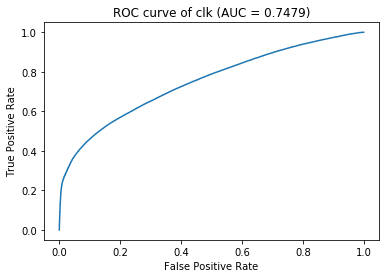

In [14]:
draw_ROC(xy_arr,auc)